### Simple CNN 1
The code below is a simple implementation of cnn with the same basic architecture found in ALVINN

In [12]:
import matplotlib
# Remove padding around screen

from PIL import Image
from os import walk
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import numpy,keras,PIL,sys


sys.path.insert(0, "/home/jason/sproj/scripts/")
from training_simulator import DataLoader
import utils


display(HTML("<style>"
    + "#notebook { padding-top:0px !important; } " 
    + ".container { width:100% !important; } "
    + ".end_space { min-height:0px !important; } "
    + "</style>"))

In [37]:
#filepath = "../datasets/car-data-3-4/"
filepath = "../datasets/track_sess_2-23/"
dl = DataLoader(filepath,10000)

train_x, train_y = dl.load()



(10001, 120, 160, 3)
-0.4285714285714286


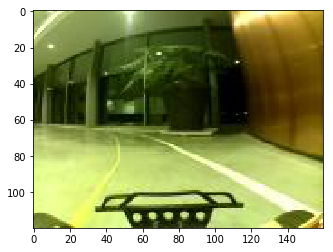

In [39]:
print(train_x.shape)
i = 310
print(utils.linear_unbin(train_y[i]))
imgplot = plt.imshow(train_x[i])


In [42]:
import models

# Load callbacks
checkpointer = keras.callbacks.ModelCheckpoint(
    filepath='../outputs/track_cnnw3.h5',
    verbose=1,
    save_best_only=True)


# Get training image row, col, channels
img_sz = train_x.shape[1:]
model = models.get_nvidia_model(15)
#train_generator, validation_generator, n_train, n_val \
#    = train.make_generators(20000, limit=limit, batch_size=batch_size, aug_perc=aug_perc)

model.compile(optimizer='adadelta',
              loss='mse',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cropping2d_3 (Cropping2D)    (None, 100, 160, 3)       0         
_________________________________________________________________
lambda_3 (Lambda)            (None, 100, 160, 3)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 80, 24)        1824      
_________________________________________________________________
elu_13 (ELU)                 (None, 50, 80, 24)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 25, 40, 32)        19232     
_________________________________________________________________
elu_14 (ELU)                 (None, 25, 40, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 20, 64)        51264     
__________

In [ ]:
model.fit(x=train_x,y=train_y,epochs=40,validation_split=0.2,callbacks=[checkpointer],batch_size=8)

Train on 8000 samples, validate on 2001 samples
Epoch 1/40
8000/8000 [==============================] - 47s 6ms/step - loss: 0.1689 - acc: 0.2717 - val_loss: 0.0562 - val_acc: 0.2874

Epoch 00001: val_loss improved from inf to 0.05621, saving model to ../outputs/track_cnnw3.h5
Epoch 2/40
8000/8000 [==============================] - 46s 6ms/step - loss: 0.0540 - acc: 0.3454 - val_loss: 0.0536 - val_acc: 0.3538

Epoch 00002: val_loss improved from 0.05621 to 0.05360, saving model to ../outputs/track_cnnw3.h5
Epoch 3/40
8000/8000 [==============================] - 46s 6ms/step - loss: 0.0518 - acc: 0.3890 - val_loss: 0.0524 - val_acc: 0.3753

Epoch 00003: val_loss improved from 0.05360 to 0.05244, saving model to ../outputs/track_cnnw3.h5
Epoch 4/40
8000/8000 [==============================] - 46s 6ms/step - loss: 0.0500 - acc: 0.4304 - val_loss: 0.0521 - val_acc: 0.3698

Epoch 00004: val_loss improved from 0.05244 to 0.05214, saving model to ../outputs/track_cnnw3.h5
Epoch 5/40
8000/8000